In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from statsmodels.stats.proportion import proportions_ztest

# Load the CSV file
df = pd.read_csv("C:\\Users\\HP\\Downloads\\marketing_AB (1).csv")

# Display the first 5rows of the dataframe
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [ ]:
#Get the column names of the datafrme
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [ ]:
# Clean column names: strip spaces and replace internal spaces with underscores
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.columns


Index(['Unnamed:_0', 'user_id', 'test_group', 'converted', 'total_ads',
       'most_ads_day', 'most_ads_hour'],
      dtype='object')

In [ ]:
# Drop the 'Unnamed:_0' column which is just an index
df.drop(columns=['Unnamed:_0'], inplace=True)
df

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


In [ ]:
# Display the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        588101 non-null  int64 
 1   test_group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total_ads      588101 non-null  int64 
 4   most_ads_day   588101 non-null  object
 5   most_ads_hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [ ]:
# check the missing values in each column of the dataframe
df.isnull().sum()

user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

In [ ]:
# Group the dataframe by 'test_group' column
#Get the total number of conversions(sum) and total users in each group(count)
conversion_counts = df.groupby('test_group')['converted'].agg(['sum', 'count'])
conversion_counts


,sum,count
test_group,,
ad,14423,564577
psa,420,23524


In [ ]:
# Get the total sum of conversions from users who came via ads
ad_conversions = conversion_counts.loc['ad', 'sum']

# Get the total count of users who came via ads
ad_users = conversion_counts.loc['ad', 'count']

# Print both values as a list
print([ad_conversions, ad_users])

[14423, 564577]


In [ ]:
# Get the total sum of conversions from users who saw the public service announcement or nothing
psa_conversions = conversion_counts.loc['psa', 'sum']

# Get the total count of users who saw the public service announcement or nothing
psa_users = conversion_counts.loc['psa', 'count']

# Print both values as a list
print([psa_conversions, psa_users])

[420, 23524]


In [ ]:
# Create a list containing both ad_conversions and psa_conversions dataframes
# This allows us to work with both conversion datasets together
conversions = [ad_conversions, psa_conversions]
conversions    # Display the list of conversion dataframes

[14423, 420]

In [ ]:
# Create a list containing both ad_users and psa_users dataframes
# This allows us to work with both users datasets together
total_users = [ad_users, psa_users]
total_users    # Display the list of users dataframes

[564577, 23524]

In [ ]:
# Perform the two-proportion z-test (two-sided test checks if the rates are simply different)
z_stat, p_val = proportions_ztest(count=conversions, nobs=total_users, alternative='two-sided')

# Display results with formatting
print("\nResults of Two-Proportion Z-Test:")
print(f"Z-statistic: {z_stat:.4f}")  # The Z-score: how many std deviations away the difference is
print(f"P-value: {p_val:.4f}")       # The probability that such a difference could occur by chance


Results of Two-Proportion Z-Test:
Z-statistic: 7.3701
P-value: 0.0000


In [ ]:
# Interpret the results
if p_val < 0.05:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is a statistically significant difference in conversion rates between the ad and Psa groups.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is no statistically significant difference in conversion rates between the ad and Psa groups.")




Conclusion: Reject the null hypothesis.
There is a statistically significant difference in conversion rates between the ad and Psa groups.


In [ ]:
# Calculate Ad group conversion rate (proportion of users who converted)
conversion_rate_ad = ad_conversions / ad_users if ad_users > 0 else 0.0
conversion_rate_ad_percent = conversion_rate_ad * 100 # Convert to percentage💯

# Print the Ad conversion rate, rounded to 2 decimal places and formatted as a percentage
print(f"Conversion Rate (Ad Group): {round(conversion_rate_ad_percent, 2)}%")

Conversion Rate (Ad Group): 2.55%


In [ ]:
# Calculate Psa group conversion rate (proportion of users who converted)
conversion_rate_psa = psa_conversions / psa_users if psa_users > 0 else 0.0
conversion_rate_psa_percent = conversion_rate_psa * 100   # Convert to percentage💯

# Print the Psa conversion rate, rounded to 2 decimal places and formatted as a percentage
print(f"Conversion Rate (PSA Group): {round(conversion_rate_psa_percent, 2)}%")

Conversion Rate (PSA Group): 1.79%


In [ ]:
# let create an assumption for the product price since is not included in the dataset
product_price = 500     # ₦500 per conversion

# Estimate additional conversions caused by ads
expected_conversions_without_ads = conversion_rate_psa * ad_users
additional_conversions_due_to_ads = ad_conversions - expected_conversions_without_ads

print(f"\nAssumed Average Revenue per Conversion: ₦{average_revenue_per_conversion:,.2f}")
print(f"Estimated Additional Conversions Due to Ads: {additional_conversions_due_to_ads:.1f}")


Assumed Average Revenue per Conversion: ₦500.00
Estimated Additional Conversions Due to Ads: 4343.0


In [ ]:
# Estimate revenue
#Estimate the Ad group revenue
revenue_ad_group = ad_conversions * product_price

#Estimate additional revenue from Ad group revenue
additional_revenue_from_ads = additional_conversions_due_to_ads * product_price

print(f"Total Revenue from Ad Group: ₦{revenue_ad_group:,.2f}")
print(f"Estimated Revenue Gained Because of Ads: ₦{additional_revenue_from_ads:,.2f}")


Total Revenue from Ad Group: ₦7,211,500.00
Estimated Revenue Gained Because of Ads: ₦2,171,491.07


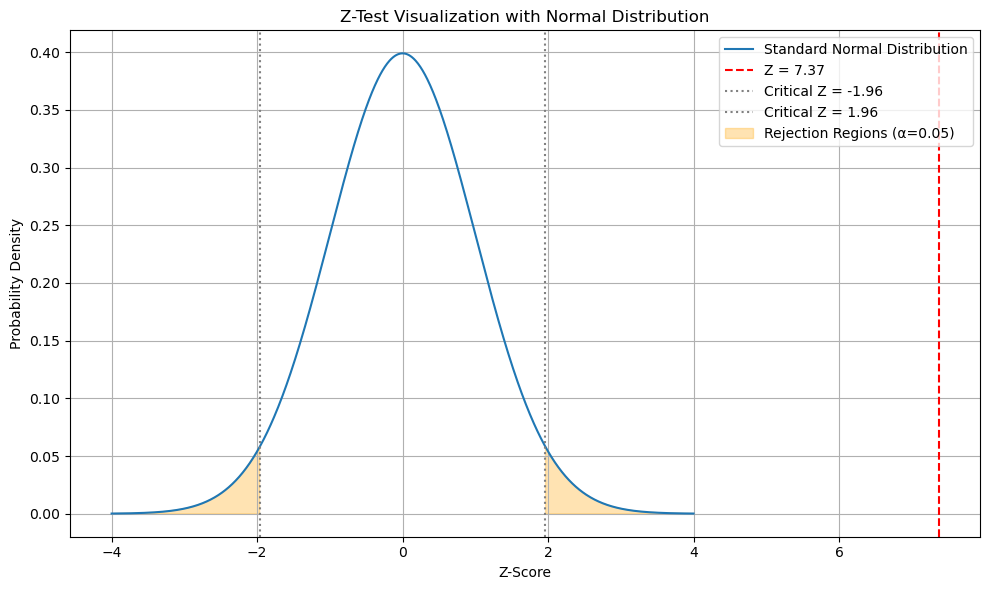

In [ ]:
# Plot normal distribution
# Generate x values for the standard normal distribution (Z-scores)
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)  # Get the probability density function values

# Set up the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution')  # Plot normal curve

# Plot your actual observed Z-statistic as a red dashed line
plt.axvline(z_stat, color='red', linestyle='--', label=f'Z = {z_stat:.2f}')

# Mark the critical values for a 95% confidence level (two-tailed test)
plt.axvline(-1.96, color='gray', linestyle=':', label='Critical Z = -1.96')
plt.axvline(1.96, color='gray', linestyle=':', label='Critical Z = 1.96')

# Shade the rejection regions (left and right tails of the distribution)
plt.fill_between(x, y, where=(x < -1.96) | (x > 1.96),
                 color='orange', alpha=0.3,
                 label='Rejection Regions (α=0.05)')

# Add title and labels
plt.title('Z-Test Visualization with Normal Distribution')
plt.xlabel('Z-Score')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The Z-score (7.37) is far beyond the critical threshold (1.96) for a two-tailed test at 5% significance.
❌ Reject H₀ because Z = 7.37 is well beyond ±1.96
So therefore, there is a statistically significant and strong effect — the Ad campaign clearly increases conversions

 I will herby concludes that with such a high Z-score, you can be extremely confident that the Ad campaign led to more conversions.

              is_ad  converted
is_ad      1.000000   0.009611
converted  0.009611   1.000000


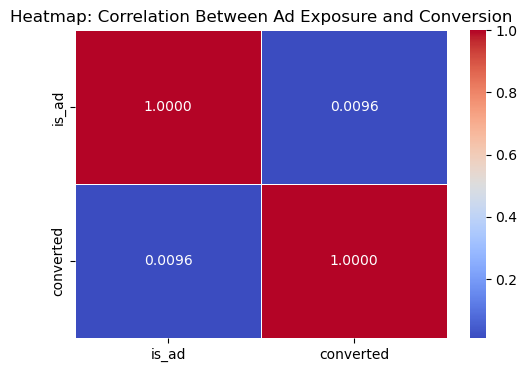

In [ ]:
# To confirm if there is a relationship between converted and the test group
# calculate correlation matrix for binary columns
df['is_ad'] = df['test_group'].apply(lambda x: 1 if x == 'ad' else 0)
df['converted'] = df['converted'].astype(int)

# Create correlation matrix
corr_matrix = df[['is_ad', 'converted']].corr()
print(corr_matrix)
# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title("Heatmap: Correlation Between Ad Exposure and Conversion")
plt.show()

The correlation is positive → people shown ads are slightly more likely to convert

But the value (0.0082) is very small → it’s a weak linear relationship

That’s normal for binary categorical comparisons — it doesn't mean the effect is unimportant

The heatmap confirms a weak but positive relationship between ad exposure and conversion.
This aligns with earlier results where the conversion rate increased from 1.79% to 2.55% for those who saw ads.


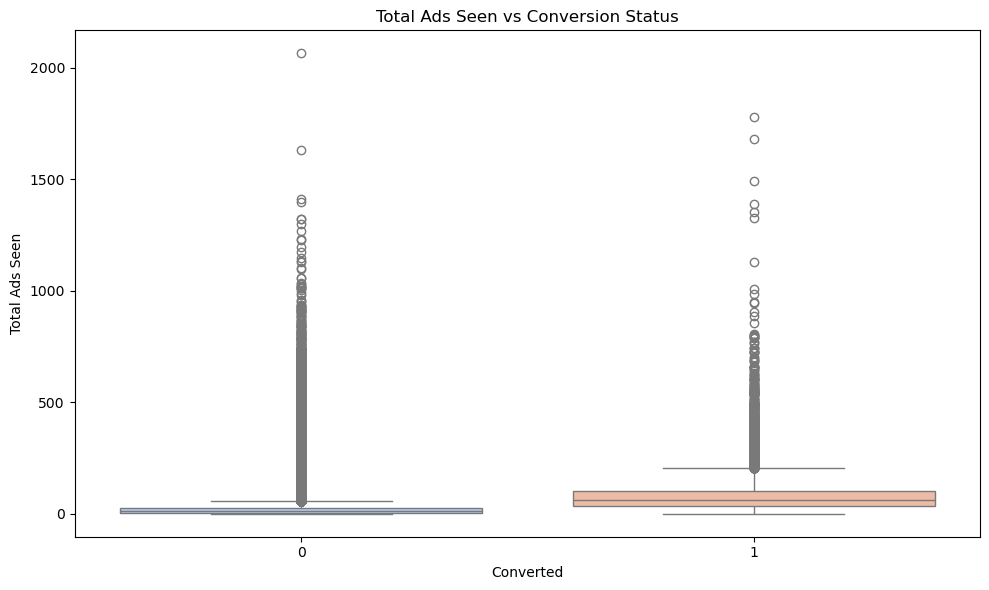

In [ ]:
# Set up the figure with appropriate size
plt.figure(figsize=(10, 6))

# Create boxplot showing relationship between conversion status and total ads seen
# The 'coolwarm' palette helps distinguish between the categories
sns.boxplot(x='converted' ,hue='converted', y='total_ads', data=df, palette='coolwarm', legend=False)

# Add descriptive title and axis labels
plt.title('Total Ads Seen vs Conversion Status', fontsize=12)
plt.xlabel('Converted', fontsize=10)
plt.ylabel('Total Ads Seen', fontsize=10)

# Optimize the layout to prevent clipping of labels
plt.tight_layout()

# Display the visualization
plt.show()

This plot visually compare how the number of ads seen (total_ads) varies between users who converted (converted = True) and those who did not (converted = False).

In this plot, the X-axis label converted shows values:
0 = User did not convert
1 = User converted

People who converted (1) were generally exposed to more ads — but simply seeing more ads doesn't guarantee conversion, especially for those in the 0 group who still saw many ads.

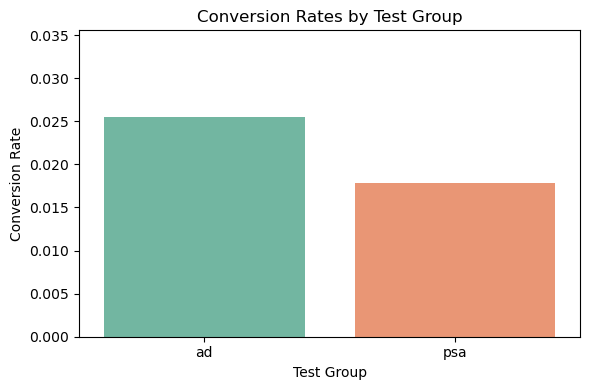

In [ ]:
# Calculate conversion rate per group
conversion_rates = df.groupby('test_group')['converted'].mean().reset_index()
conversion_rates.columns = ['Test Group', 'Conversion Rate']

# Plot setup with descriptive variable names
figure_size = (6, 4)
plt.figure(figsize=figure_size)
sns.barplot(x='Test Group', y='Conversion Rate', hue='Test Group', data=conversion_rates, palette='Set2', legend=False)

# Add informative title and axis labels
plt.title("Conversion Rates by Test Group")
plt.xlabel("Test Group")
plt.ylabel("Conversion Rate")

# Set y-axis limit with some padding for better visualization
max_conversion_rate = conversion_rates['Conversion Rate'].max()
padding = 0.01
plt.ylim(0, max_conversion_rate + padding)

# Optimize layout and display the plot

plt.tight_layout()
plt.show()

This plot compares the conversion rates between the two experimental groups: "ad" and "psa" (public service announcement or control group).

The Ad campaign significantly improves the conversion rate over the PSA group. This plot visually confirms that users who saw the ads were more likely to convert.

Conversion Rate by Day User Saw Most Ads:
  most_ads_day  converted
0       Friday   0.022212
1       Monday   0.032812
2     Saturday   0.021051
3       Sunday   0.024476
4     Thursday   0.021571
5      Tuesday   0.029840
6    Wednesday   0.024942


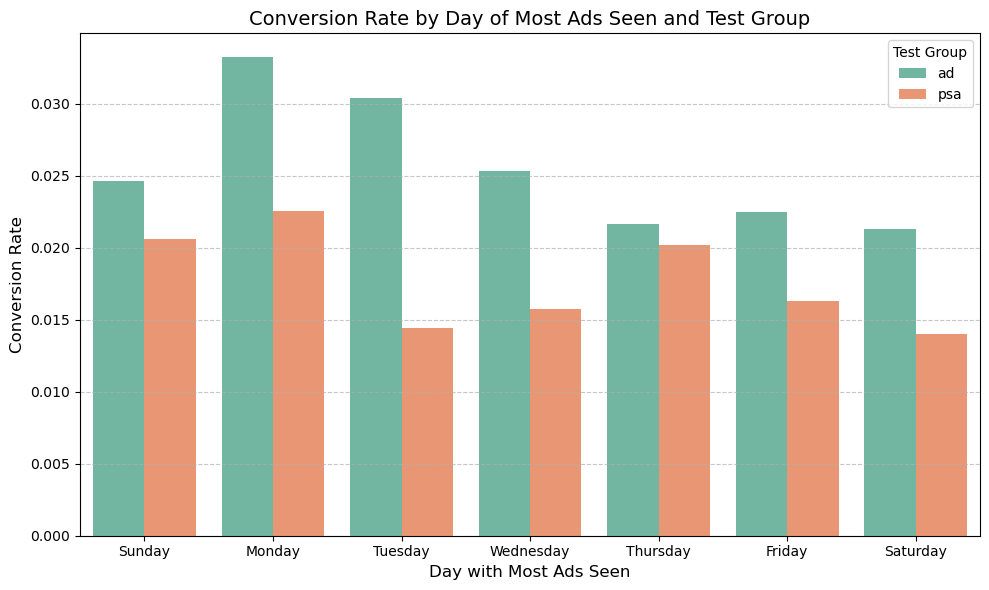


Day with Highest Conversion Rate (Most Ads Day): Day Monday (Conversion Rate: 0.0328)
Day with Lowest Conversion Rate (Most Ads Day): Day Saturday (Conversion Rate: 0.0211)


In [ ]:
# Group by 'Most Ads Day' and calculate the conversion rate
# The mean of the 'Converted' column (True/False) gives the proportion of conversions
conversion_by_most_ads_day = df.groupby('most_ads_day', observed=False)['converted'].mean().reset_index()


# Assuming 'Most Ads Day' is represented by numbers (e.g., 0 for Monday, 6 for Sunday)
# Let's assume it's numerical days (0-6) from Sunday to Saturday,then adjust the sorting.
conversion_by_most_ads_day = conversion_by_most_ads_day.sort_values('most_ads_day')


print("Conversion Rate by Day User Saw Most Ads:")
print(conversion_by_most_ads_day)

# Plot the conversion rate by day and group
plt.figure(figsize=(10, 6))
sns.barplot(x='Most Ads Day', y='Conversion Rate', hue='Test Group', data=conversion_by_day, palette='Set2')

# order the days of the week for better visualization
# Define the correct weekday order from Sunday to Saturday
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Ensure 'most_ads_day' is a categorical variable with proper order
df['most_ads_day'] = pd.Categorical(df['most_ads_day'], categories=day_order, ordered=True)


# Titles and labels
plt.title('Conversion Rate by Day of Most Ads Seen and Test Group', fontsize=14)
plt.xlabel('Day with Most Ads Seen', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.legend(title='Test Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# --- Identify High/Low Conversion Days ---

highest_conversion_day = conversion_by_most_ads_day.loc[conversion_by_most_ads_day['converted'].idxmax()]
lowest_conversion_day = conversion_by_most_ads_day.loc[conversion_by_most_ads_day['converted'].idxmin()]

print(f"\nDay with Highest Conversion Rate (Most Ads Day): Day {highest_conversion_day['most_ads_day']} (Conversion Rate: {highest_conversion_day['converted']:.4f})")
print(f"Day with Lowest Conversion Rate (Most Ads Day): Day {lowest_conversion_day['most_ads_day']} (Conversion Rate: {lowest_conversion_day['converted']:.4f})")


This plot reveals which days of the week users were shown the most ads and whether they converted.

Higher conversion rates on weekdays aer from Monday–Wednesday suggest that people may respond better to ads during routine days when they are more structured and available online.

Lower conversion on weekend like Saturday might indicate lower engagement or attention span for purchasing decisions

Focus ad delivery on high-performing weekdays like Monday reduces budget spend on low-converting days like Saturday


Conversion Rate by Hour User Saw Most Ads:
    most_ads_hour  converted
0               0   0.018425
1               1   0.012911
2               2   0.007313
3               3   0.010452
4               4   0.015235
5               5   0.020915
6               6   0.022244
7               7   0.018111
8               8   0.019516
9               9   0.019191
10             10   0.021521
11             11   0.022116
12             12   0.023828
13             13   0.024677
14             14   0.028063
15             15   0.029653
16             16   0.030772
17             17   0.028210
18             18   0.027380
19             19   0.026720
20             20   0.029803
21             21   0.028923
22             22   0.026105
23             23   0.022662


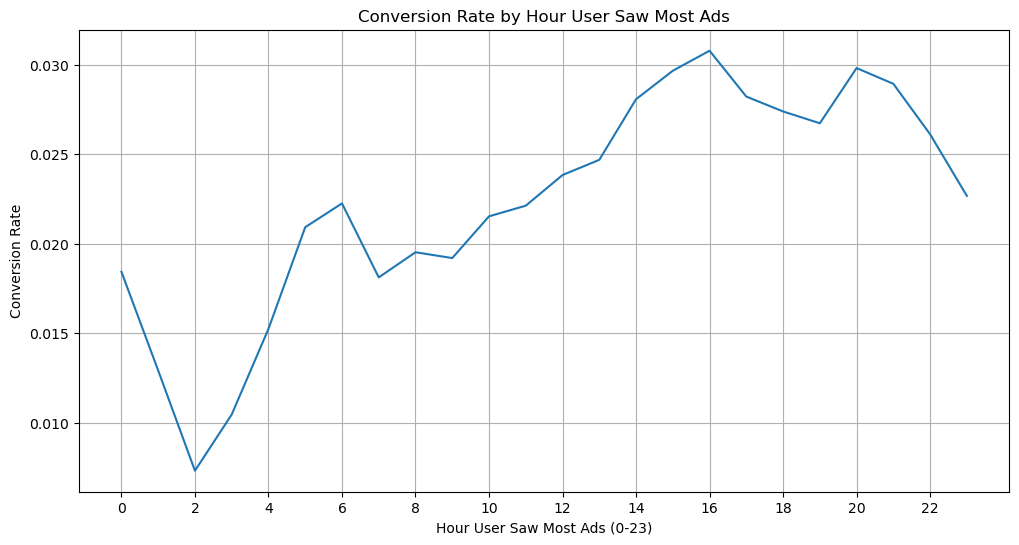


Hour with Highest Conversion Rate (Most Ads Hour): Hour 16.0 (Conversion Rate: 0.0308)
Hour with Lowest Conversion Rate (Most Ads Hour): Hour 2.0 (Conversion Rate: 0.0073)


In [ ]:

# --- Analyze Conversion Rate by Most Ads Hour ---

# Group by 'Most Ads Hour' and calculate the conversion rate
conversion_by_most_ads_hour = df.groupby('most_ads_hour', observed=False)['converted'].mean().reset_index()

# Sort by hour for proper plotting sequence
conversion_by_most_ads_hour = conversion_by_most_ads_hour.sort_values('most_ads_hour')


print("Conversion Rate by Hour User Saw Most Ads:")
print(conversion_by_most_ads_hour)


# --- Visualize the Trend ---

plt.figure(figsize=(12, 6)) # Adjust figure size for potentially more hours
sns.lineplot(x='most_ads_hour', y='converted', data=conversion_by_most_ads_hour)
plt.title('Conversion Rate by Hour User Saw Most Ads')
plt.xlabel('Hour User Saw Most Ads (0-23)')
plt.ylabel('Conversion Rate')
plt.xticks(range(0, 24, 2)) # Set x-axis ticks to show every other hour
plt.grid(True)
plt.show()


# --- Identify High/Low Conversion Hours ---

highest_conversion_hour = conversion_by_most_ads_hour.loc[conversion_by_most_ads_hour['converted'].idxmax()]
lowest_conversion_hour = conversion_by_most_ads_hour.loc[conversion_by_most_ads_hour['converted'].idxmin()]

print(f"\nHour with Highest Conversion Rate (Most Ads Hour): Hour {highest_conversion_hour['most_ads_hour']} (Conversion Rate: {highest_conversion_hour['converted']:.4f})")
print(f"Hour with Lowest Conversion Rate (Most Ads Hour): Hour {lowest_conversion_hour['most_ads_hour']} (Conversion Rate: {lowest_conversion_hour['converted']:.4f})")

This plot identifies time slots when users are most likely to convert after seeing ads.
Shows which hours are prime time for placing ads.

Target your ads during high-performing hour like 16.0. This boosts efficiency and ROI without increasing ad spend.